In [1]:
#Identifying transiting exoplanet signals in a light curve

In [2]:
import lightkurve as lk
import matplotlib.pyplot as plt
%matplotlib inline

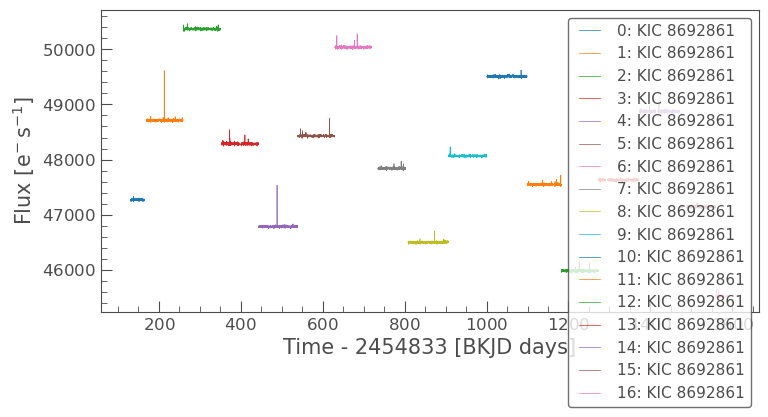

In [4]:
# Search for Kepler observations of Kepler-69
search_result = lk.search_lightcurve('Kepler-69', author='Kepler', cadence='long')
# Download all available Kepler light curves
lc_collection = search_result.download_all()
lc_collection.plot();

In [5]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 01,2009,Kepler,1800,kplr008692861,0.0
1,Kepler Quarter 02,2009,Kepler,1800,kplr008692861,0.0
2,Kepler Quarter 03,2009,Kepler,1800,kplr008692861,0.0
3,Kepler Quarter 04,2010,Kepler,1800,kplr008692861,0.0
4,Kepler Quarter 05,2010,Kepler,1800,kplr008692861,0.0
5,Kepler Quarter 06,2010,Kepler,1800,kplr008692861,0.0
6,Kepler Quarter 07,2010,Kepler,1800,kplr008692861,0.0
7,Kepler Quarter 08,2011,Kepler,1800,kplr008692861,0.0
8,Kepler Quarter 09,2011,Kepler,1800,kplr008692861,0.0


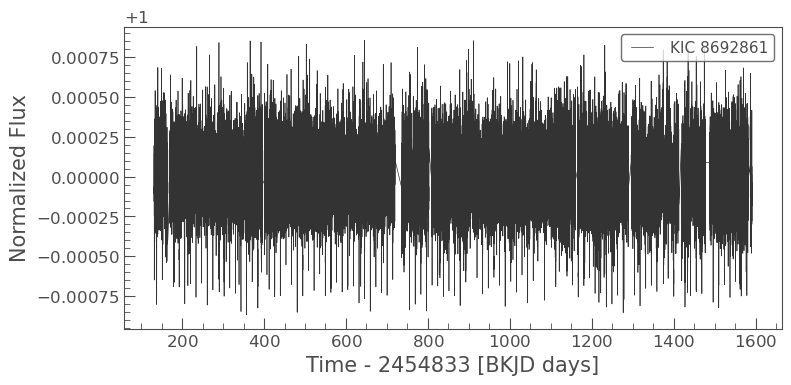

In [6]:
# Flatten the light curve
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot();

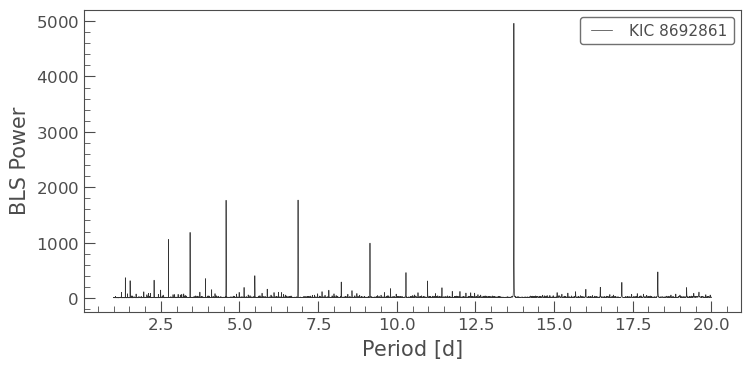

In [7]:
#Searching for Transiting Planets in a Kepler Light Curve Using BLS
import numpy as np
# Create array of periods to search
period = np.linspace(1, 20, 10000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
bls.plot();

In [8]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power
# Check the value for period
planet_b_period

<Quantity 13.72177218 d>

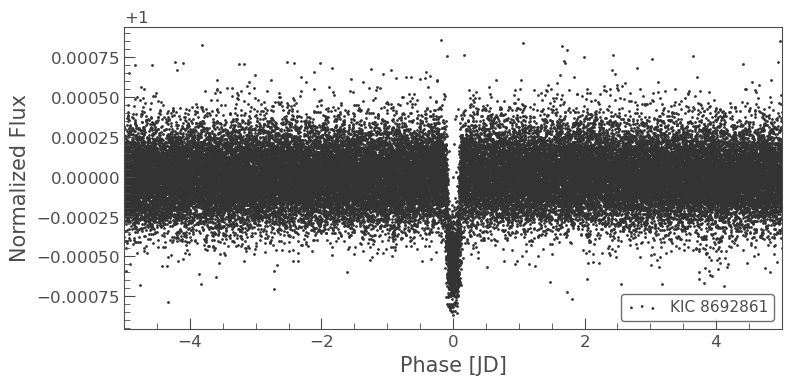

In [9]:
ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax.set_xlim(-5, 5);

In [10]:
#Retrieving a Transit Model and Cadence Mask
# Create a cadence mask using the BLS parameters
planet_b_mask = bls.get_transit_mask(period=planet_b_period,
                                     transit_time=planet_b_t0,
                                     duration=planet_b_dur)

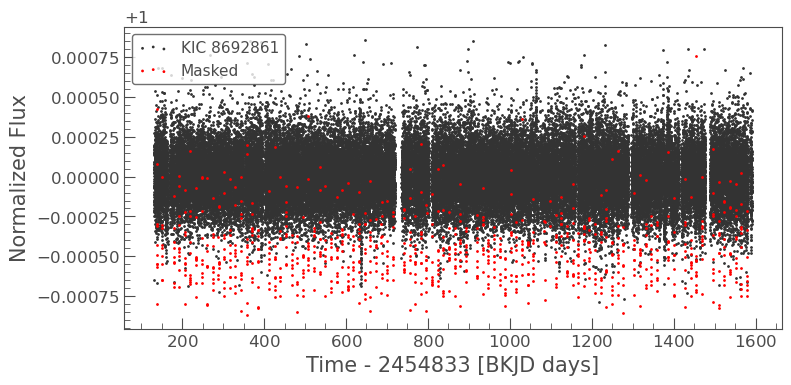

In [11]:
masked_lc = lc[~planet_b_mask]
ax = masked_lc.scatter();
lc[planet_b_mask].scatter(ax=ax, c='r', label='Masked');

In [12]:
# Create a BLS model using the BLS parameters
planet_b_model = bls.get_transit_model(period=planet_b_period,
                                       transit_time=planet_b_t0,
                                       duration=planet_b_dur)

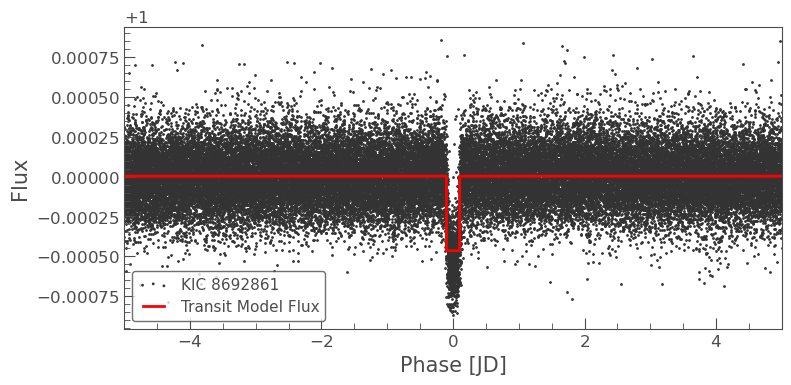

In [13]:
ax = lc.fold(planet_b_period, planet_b_t0).scatter()
planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-5, 5);

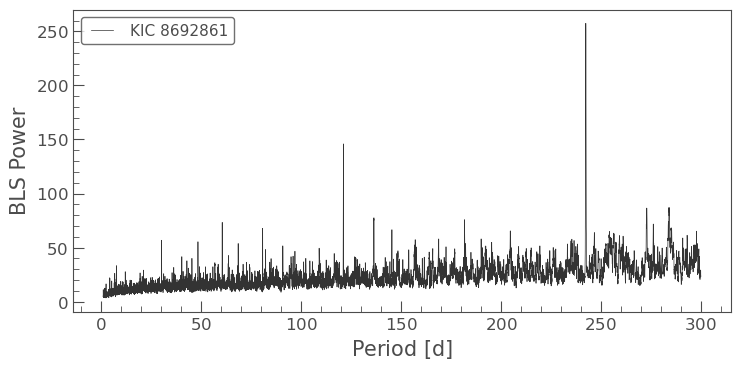

In [14]:
#Identifying Additional Transiting Planet Signals in the Same Light Curve
period = np.linspace(1, 300, 10000)
bls = masked_lc.to_periodogram('bls', period=period, frequency_factor=500)
bls.plot();

In [15]:
planet_c_period = bls.period_at_max_power
planet_c_t0 = bls.transit_time_at_max_power
planet_c_dur = bls.duration_at_max_power
# Check the value for period
planet_c_period

<Quantity 242.46664666 d>

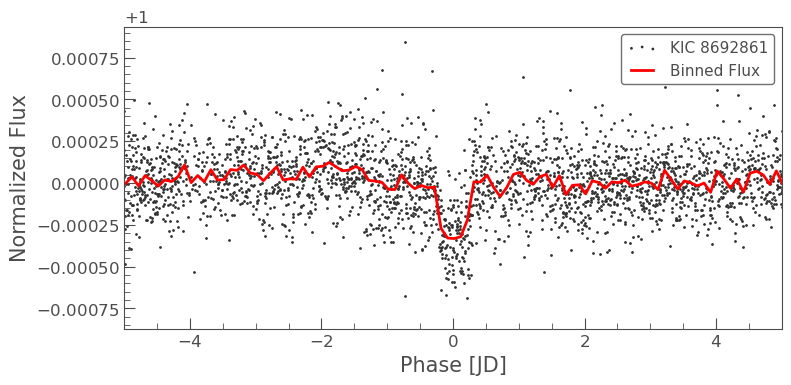

In [16]:
ax = masked_lc.fold(planet_c_period, planet_c_t0).scatter()
masked_lc.fold(planet_c_period, planet_c_t0).bin(.1).plot(ax=ax, c='r', lw=2,
                                                          label='Binned Flux')
ax.set_xlim(-5, 5);

In [17]:
planet_c_model = bls.get_transit_model(period=planet_c_period,
                                       transit_time=planet_c_t0,
                                       duration=planet_c_dur)

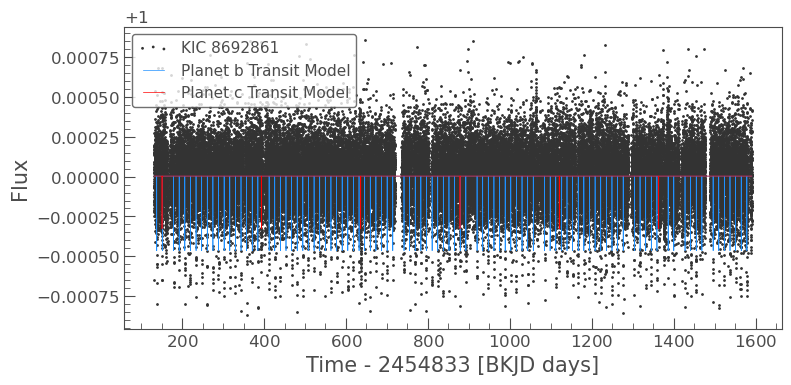

In [18]:
ax = lc.scatter();
planet_b_model.plot(ax=ax, c='dodgerblue', label='Planet b Transit Model');
planet_c_model.plot(ax=ax, c='r', label='Planet c Transit Model');

In [21]:
lc.interact_bls(notebook_url="localhost:8888")